In [34]:
import pandas as pd
import os, sys, platform
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import sklearn as sk
import seaborn as sns

In [35]:
print(os.getcwd())
import os
data = pd.read_csv(r'C:\Users\bpandey1\Downloads\winequality-red.csv',sep=';')
data.info()

C:\Users\bpandey1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
##checking missing values in the dataset
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [38]:
##Removing the duplicates data##All duplicates are dropped
data.drop_duplicates(inplace=True)
data.shape
data.duplicated().sum()

0

In [39]:
##Looking the correlation among the values
spearman_corr = data.select_dtypes(include=['float64', 'int64']).corr(method="spearman")
print(spearman_corr)


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.280162     0.657387   
volatile acidity          -0.280162          1.000000    -0.610925   
citric acid                0.657387         -0.610925     1.000000   
residual sugar             0.222396          0.031299     0.170096   
chlorides                  0.244095          0.170678     0.110679   
free sulfur dioxide       -0.157857          0.012162    -0.059585   
total sulfur dioxide      -0.083827          0.092548     0.021124   
density                    0.626628          0.032264     0.344303   
pH                        -0.708560          0.245973    -0.558594   
sulphates                  0.220696         -0.324207     0.341512   
alcohol                   -0.062696         -0.225714     0.090798   
quality                    0.111693         -0.387450     0.219427   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

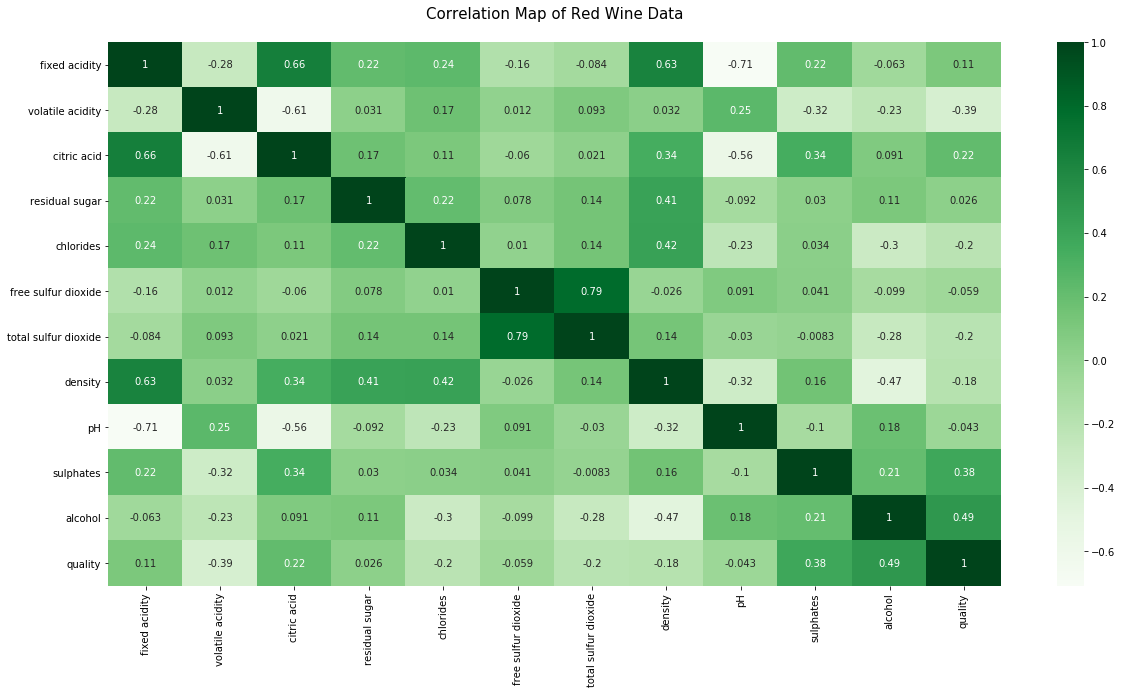

In [40]:
##correlation map 
plt.figure(figsize=(20, 10))
sns.heatmap(spearman_corr, cmap="Greens", annot=True)
plt.title("Correlation Map of Red Wine Data\n", fontsize=15)
plt.show()

In [41]:
correlation= data.corr()
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

In [42]:
quality_counts = data["quality"].value_counts()
quality_counts

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

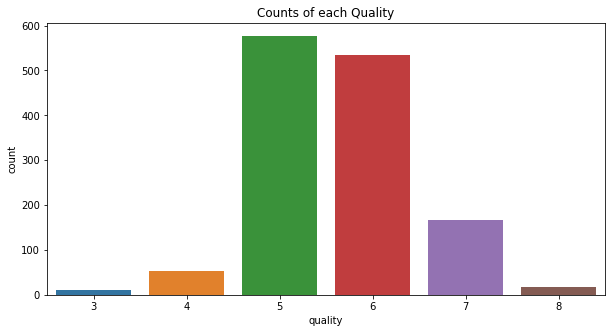

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="quality", )
plt.title("Counts of each Quality")
plt.show()

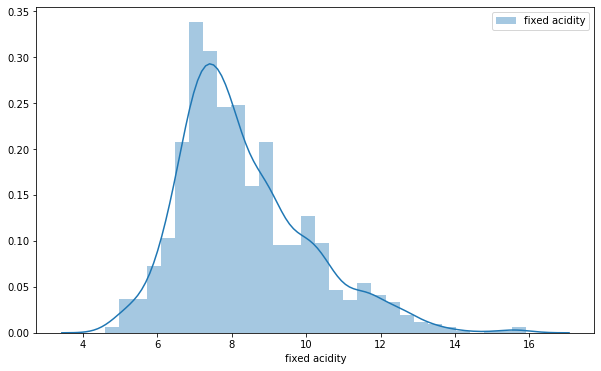

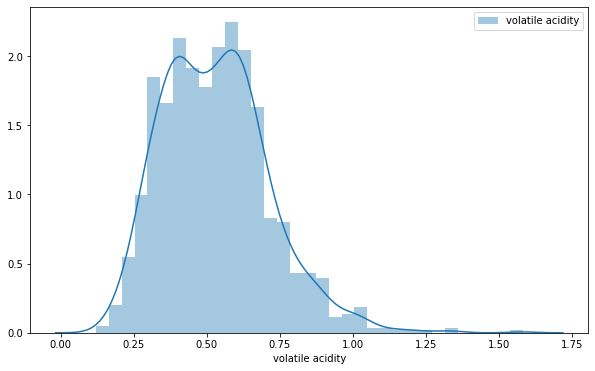

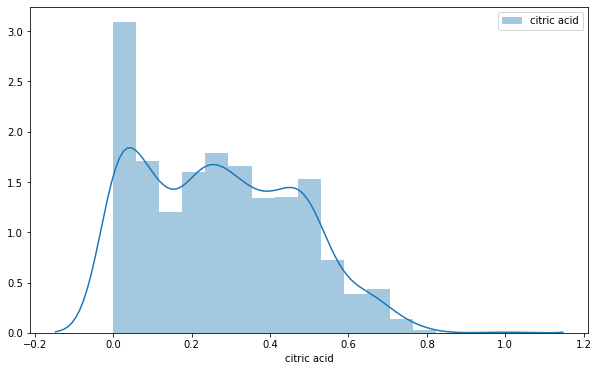

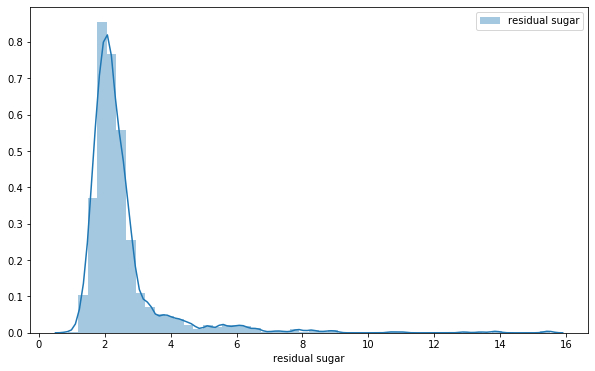

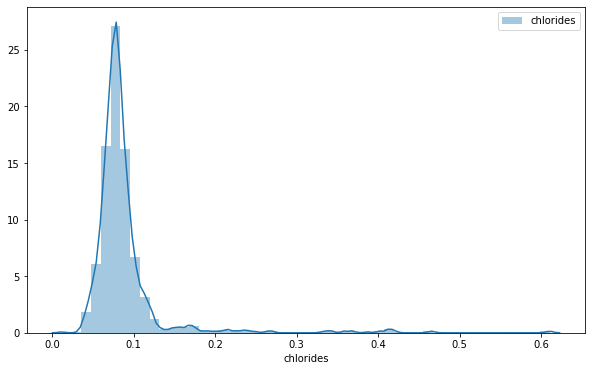

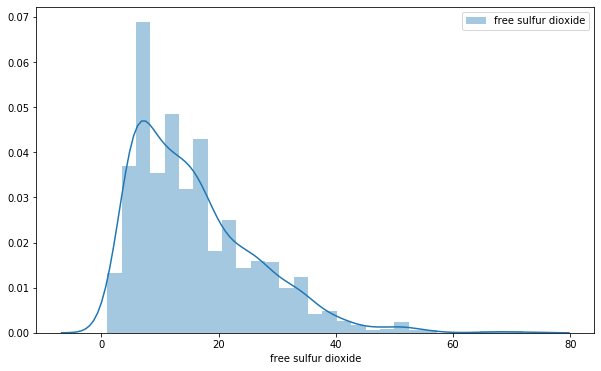

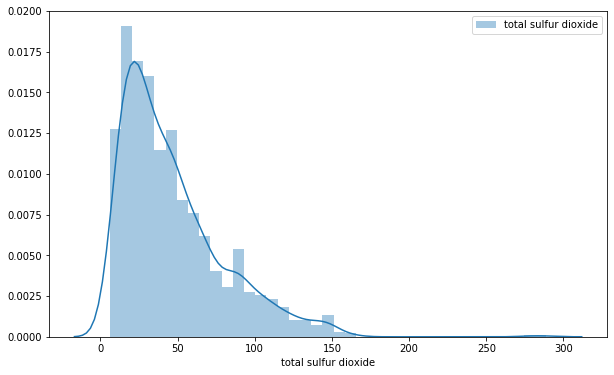

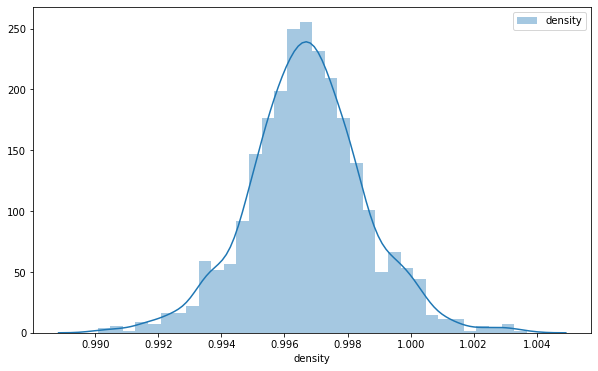

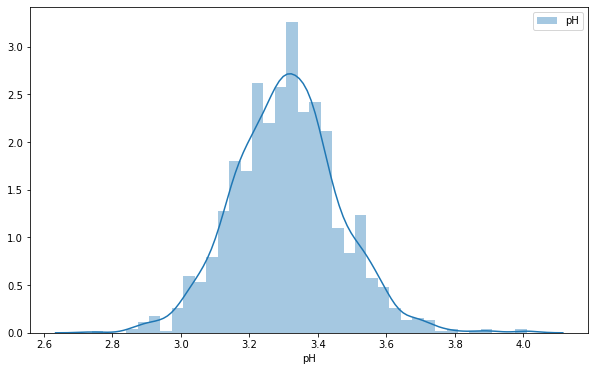

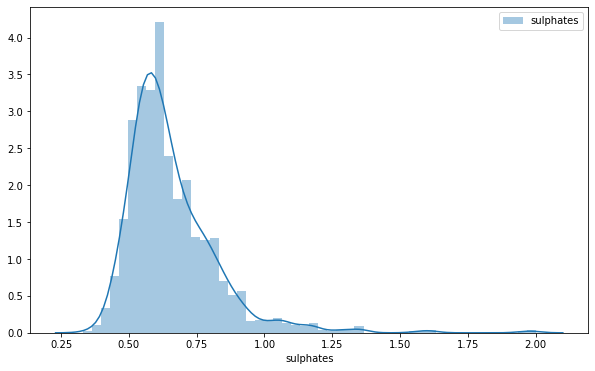

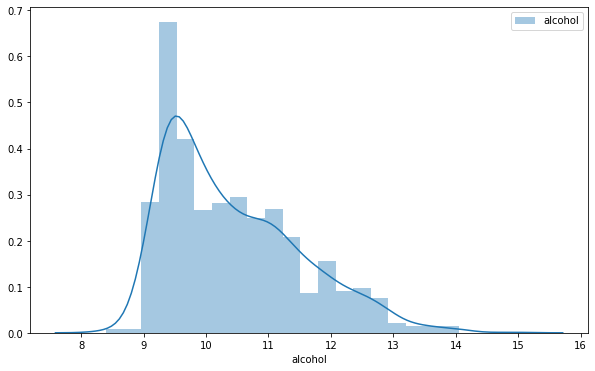

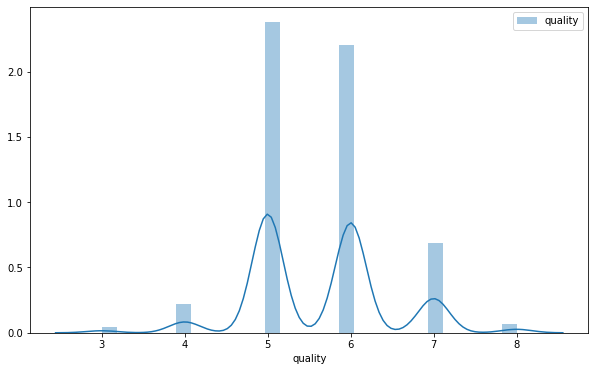

In [44]:
##PDF of each of the columns
for column in data.columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    sns.distplot(data[column], kde=True)
    ax.legend(labels=[column])
    plt.show()

[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Alcohol in different wine quality types')]

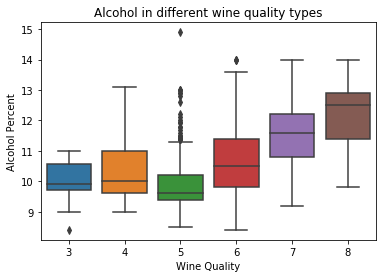

In [45]:
# categorical Plot of Alcohol against Quality
box_plot= sns.boxplot(x="quality", y='alcohol', data=data)
box_plot.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol in different wine quality types')

[Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Fixed Acidity in different types of Wine Quality')]

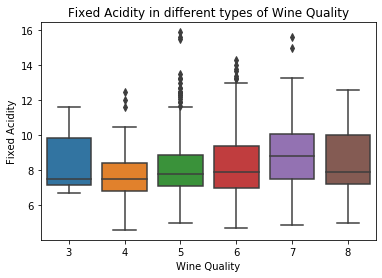

In [46]:
box_plot = sns.boxplot(x="quality", y='fixed acidity', data = data)
box_plot.set(xlabel='Wine Quality', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine Quality')

[Text(0, 0.5, 'Volatile Acidity'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Volatile Acidity in different types of Wine Quality')]

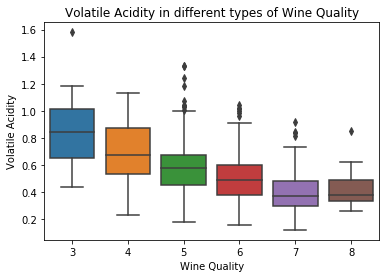

In [47]:
box_plot = sns.boxplot(x="quality", y='volatile acidity', data = data)
box_plot.set(xlabel='Wine Quality', ylabel='Volatile Acidity', title='Volatile Acidity in different types of Wine Quality')

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine Quality')]

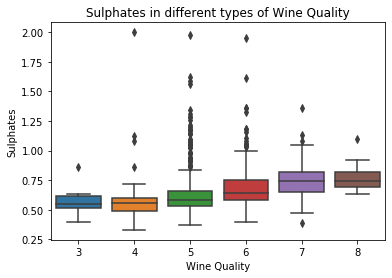

In [48]:
box_plot = sns.boxplot(x="quality", y='sulphates', data = data)
box_plot.set(xlabel='Wine Quality', ylabel='Sulphates', title='Sulphates in different types of Wine Quality')

[Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Citric Acid in different types of Wine Quality')]

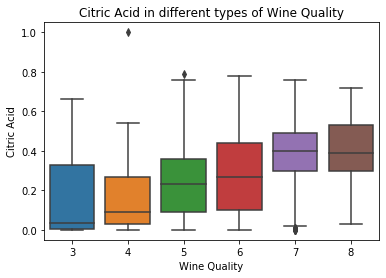

In [49]:
box_plot = sns.boxplot(x="quality", y='citric acid', data = data)
box_plot.set(xlabel='Wine Quality', ylabel='Citric Acid', title='Citric Acid in different types of Wine Quality')

[Text(0, 0.5, 'Ph'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'pH in different types of Wine Quality')]

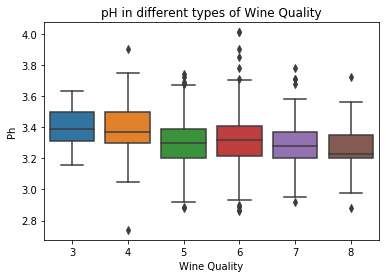

In [50]:
box_plot = sns.boxplot(x="quality", y='pH', data = data)
box_plot.set(xlabel='Wine Quality', ylabel='Ph', title='pH in different types of Wine Quality')

[Text(0, 0.5, 'residual sugar'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'residual sugar in different types of Wine Quality')]

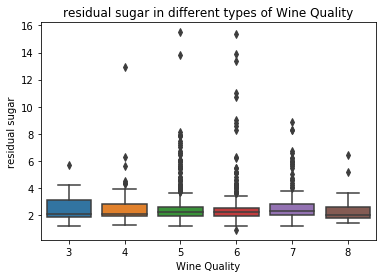

In [52]:
box_plot = sns.boxplot(x="quality", y='residual sugar', data = data)
box_plot.set(xlabel='Wine Quality', ylabel='residual sugar', title='residual sugar in different types of Wine Quality')